# Proyecto Sprint 4 | Carlos Vallejo Leal

Para este proyecto, trabajarás con datos de Instacart.

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash. Este conjunto de datos particular fue lanzado públicamente (materiales en inglés) por Instacart en 2017 para una competición Kaggle (materiales en inglés). Los datos reales pueden descargarse directamente de la página de la competición Kaggle.

El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Tu misión es limpiar los datos y preparar un informe que brinde información sobre los hábitos de compra de los clientes de Instacart. Después de responder a cada pregunta, escribe una breve explicación de tus resultados en una celda markdown de tu Jupyter notebook.

Este proyecto requerirá que hagas gráficos que comuniquen tus resultados. Asegúrate de que cualquier gráfico que vayas a crear tenga un título, ejes etiquetados y una leyenda si es necesario; e incluye plt.show() al final de cada celda con un gráfico.

Si deseas más consejos sobre el proyecto, puedes mirar este video: 
https://www.youtube.com/watch?v=2D01DWihCTo

## Diccionario de Datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

* instacart_orders.csv: cada fila corresponde a un pedido en la aplicación Instacart.
    * 'order_id': número de ID que identifica de manera única cada pedido.
    * 'user_id': número de ID que identifica de manera única la cuenta de cada cliente.
    * 'order_number': el número de veces que este cliente ha hecho un pedido.
    * 'order_dow': día de la semana en que se hizo un pedido (0 si es domingo).
    * 'order_hour_of_day': hora del día en que se hizo el pedido.
    * 'days_since_prior_order': número de días transcurridos desde que este cliente hizo su pedido anterior.
* products.csv: cada fila corresponde a un producto único que pueden comprar los clientes.
    * 'product_id': número ID que identifica de manera única cada producto.
    * 'product_name': nombre del producto.
    * 'aisle_id': número ID que identifica de manera única cada categoría de pasillo de víveres.
    * 'department_id': número ID que identifica de manera única cada departamento de víveres.
* order_products.csv: cada fila corresponde a un artículo pedido en un pedido.
    * 'order_id': número de ID que identifica de manera única cada pedido.
    * 'product_id': número ID que identifica de manera única cada producto.
    * 'add_to_cart_order': el orden secuencial en el que se añadió cada artículo en el carrito.
    * 'reordered': 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
* aisles.csv
    * 'aisle_id': número ID que identifica de manera única cada categoría de pasillo de víveres.
    * 'aisle': nombre del pasillo.
* departments.csv
    * 'department_id': número ID que identifica de manera única cada departamento de víveres.
    * 'department': nombre del departamento.

## Instrucciones

### Paso 1:

Abre los archivos de datos (/datasets/instacart_orders.csv, /datasets/products.csv, /datasets/aisles.csv, /datasets/departments.csv y /datasets/order_products.csv) y echa un vistazo al contenido general de cada tabla.

Observa que los archivos tienen un formato no estándar, así que vas a necesitar establecer ciertos argumentos en pd.read_csv() para leer los datos correctamente. Mira los archivos CSV para tener una idea de cuáles deberían ser esos argumentos.

Ten en cuenta que order_products.csv contiene muchas filas de datos. Cuando un DataFrame tiene demasiadas filas, info() no imprimirá los recuentos no nulos por defecto. Si quieres imprimir los recuentos no nulos, incluye show_counts=True cuando llames a info().

In [2]:
# As always first I'll import pandas and matplot
import pandas as pd
from matplotlib import pyplot as plt

# Open up csvs
aisles = pd.read_csv('aisles.csv', sep=';')
departments = pd.read_csv('departments.csv', sep=';')
instacart_orders = pd.read_csv('instacart_orders.csv', sep=';')
order_products = pd.read_csv('order_products.csv', sep=';')
products = pd.read_csv('products.csv', sep=';')

#print(aisles.head())
#print(departments.head())
#print(instacart_orders.head())
#print(order_products.head())
#print(products.head())


Al abrir mis archivos csv note que todos tienen como separador un punto y coma ';', entonces pase el argumento sep=';' a mi .read_csv para poder leerlos correctamente. A su vez asigned estos dataframes a un DF con el nombre correspondiente al csv origen.

### Paso 2

Preprocesa los datos de la siguiente manera:

* Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
* Identifica y completa los valores ausentes.
* Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

In [3]:
print('Aisles\n')
aisles.info()
print('\nDepartments\n')
departments.info()
print('\nInstacart Orders\n')
instacart_orders.info()
print('\nOrder Products\n')
order_products.info(show_counts=True)
print('\nProducts\n')
products.info()

Aisles

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB

Departments

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes

Instacart Orders

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64 

Todas mis columnas de ID son numeros enteros.

In [4]:
#Checo donde tengo valores ausentes
print('Aisles\n',aisles.isna().sum())
print('\nDepartments\n',departments.isna().sum())
print('\nInstacart Orders\n',instacart_orders.isna().sum())
print('\nOrder Products\n',order_products.isna().sum())
print('\nProducts\n',products.isna().sum())

Aisles
 aisle_id    0
aisle       0
dtype: int64

Departments
 department_id    0
department       0
dtype: int64

Instacart Orders
 order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28819
dtype: int64

Order Products
 order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64

Products
 product_id          0
product_name     1258
aisle_id            0
department_id       0
dtype: int64


Mis valores ausentes se encuentran en:
* 'Order Products', 836 valores en add_to_cart_order.
* 'Products', 1258 valores en product_name.
* 'Instacart Orders', 28819 valores en days_since_prior_order.

#### order_products

In [5]:
#order_products.groupby('order_id')['product_id'].count()
#order_products.query("order_id == 4").sort_values('add_to_cart_order')

Para "order_products" son 836 valores SECUENCIALES de mas de 4.5millones, aprox un 0.018% de los datos, por lo que mi decisión es remover estos datos. Ya que estos datos son una secuencia y un orden especifico, no tiene sentido usar una medida como la moda, la media o mediana. Estos datos pudieron tener un problema al agregarse, de cualquier forma, agregar datos al azar podria agregar ruido a como cada uno de estos productos se agrega y a los datos que esta columna nos puede brindar. Para deshacerme de estos datos usare un dropna.

In [6]:
print("Valores ausentes:\n",order_products.isna().sum())

order_products = order_products.dropna()
# Verificar si en efecto, mis datos ya fueron dropeados
order_products.isna().sum()

Valores ausentes:
 order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64


order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

#### products

Para products tengo datos ausentes en la columna de product name, ya tengo el product_id para todos, supongo que en algun momento dejaron de llenar los datos de esto o de pasarlos directo, peor en algun lugar debe haber algun registro de que nombre le pertenece a que ID de producto. Entonces por lo pronto los rellenare con 'unknown'.

In [7]:
print("Valores ausentes:\n",products.isna().sum())

products['product_name'] = products['product_name'].fillna('unknown')

products.isna().sum()

Valores ausentes:
 product_id          0
product_name     1258
aisle_id            0
department_id       0
dtype: int64


product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64

#### instacart_orders

Para instacart_orders, los valores que me faltan son los dias transcurridos desde la ultima orden. En este data set use unique con sort para ver que valores tengo, estos valores van desde 0 a 30. No hay ningun otro tipo de valor, entonces en este caso, como no hay valores extremos, opte por reemplazar mis valores ausentes con la media, la cual me debe de dar una tendencia central.

Quiza y estos valores al comienzo no se estaba recopilando, o podria ser un usuario que reactivo su cuenta o bien un nuevo usuario haciendo su primer pedido.

In [8]:
instacart_orders['days_since_prior_order'].sort_values().unique()

print("Valores ausentes:",instacart_orders['days_since_prior_order'].isna().sum())

avg_instacart = instacart_orders['days_since_prior_order'].mean()
instacart_orders['days_since_prior_order'] = instacart_orders['days_since_prior_order'].fillna(avg_instacart)

instacart_orders.isna().sum()

Valores ausentes: 28819


order_id                  0
user_id                   0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64

#### Duplicated Values

In [9]:
# Checo donde puedo tener valores duplicados

print('Aisles Duplicated:',aisles.duplicated().sum())
print('Departments Duplicated:',departments.duplicated().sum())
print('Instacart Orders Duplicated:',instacart_orders.duplicated().sum())
print('Order Products Duplicated:',order_products.duplicated().sum())
print('Products Dupplicated:',products.duplicated().sum())


Aisles Duplicated: 0
Departments Duplicated: 0
Instacart Orders Duplicated: 15
Order Products Duplicated: 0
Products Dupplicated: 0


Solamente tengo valores duplicados en instacart orders, entonces los removere con drop duplicates.

In [10]:
# Remover duplicados
instacart_orders = instacart_orders.drop_duplicates()

print('Instacart Orders Duplicated:',instacart_orders.duplicated().sum())

Instacart Orders Duplicated: 0


### Paso 3

Una vez que los datos estén procesados y listos, haz el siguiente análisis:

#### A

1. Verifica que los valores en las columnas 'order_hour_of_day' y 'order_dow' de la tabla orders sean razonables (o sea, 'order_hour_of_day' va de 0 a 23 y 'order_dow' va de 0 a 6).

In [11]:
# Puedo checarlo manualmente
print("Day of the week unique values:\n",instacart_orders['order_dow'].sort_values().unique())
print("\nHour of the day unique values:\n",instacart_orders['order_hour_of_day'].sort_values().unique())

# Puedo usar .between() y .all()

order_dow_reasonable = instacart_orders['order_dow'].between(0,6).all()
order_hour_of_day_reasonable = instacart_orders['order_hour_of_day'].between(0,23).all()

print("\nAre Days of the week between 0-6?",order_dow_reasonable)
print("Are hour of the day values between 0-23?",order_hour_of_day_reasonable)


Day of the week unique values:
 [0 1 2 3 4 5 6]

Hour of the day unique values:
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]

Are Days of the week between 0-6? True
Are hour of the day values between 0-23? True


Mis valores si son razonables ya que se encuentran dentro de los valores que deberian de.

2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.

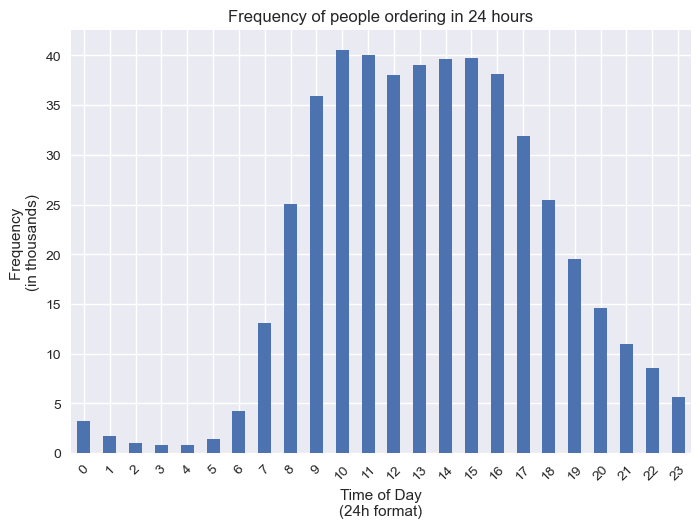

'\n# Histograma\ninstacart_orders[\'order_hour_of_day\'].plot(kind=\'hist\',\n                                           bins=24, \n                                           title=\'Frequency of people ordering in 24 hours\',\n                                           xlabel= "Time of Day\n(24h format)"\n                                           )\nplt.show()\n'

In [22]:
# Entre 1000 para tener mi numero mas limpio en la gráfica
#people_time_of_day = (instacart_orders.groupby('order_hour_of_day')['user_id'].count())/1000
people_time_of_day = (instacart_orders['order_hour_of_day'].value_counts().sort_index())/1000

# Barras
people_time_of_day.plot(kind = 'bar',
                        title = 'Frequency of people ordering in 24 hours',
                        xlabel='Time of Day\n(24h format)',
                        ylabel= 'Frequency \n(in thousands)',
                        rot = 45,
                        )
plt.show()

'''
# Histograma
instacart_orders['order_hour_of_day'].plot(kind='hist',
                                           bins=24, 
                                           title='Frequency of people ordering in 24 hours',
                                           xlabel= "Time of Day\n(24h format)"
                                           )
plt.show()
'''

3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.

<function matplotlib.pyplot.show(close=None, block=None)>

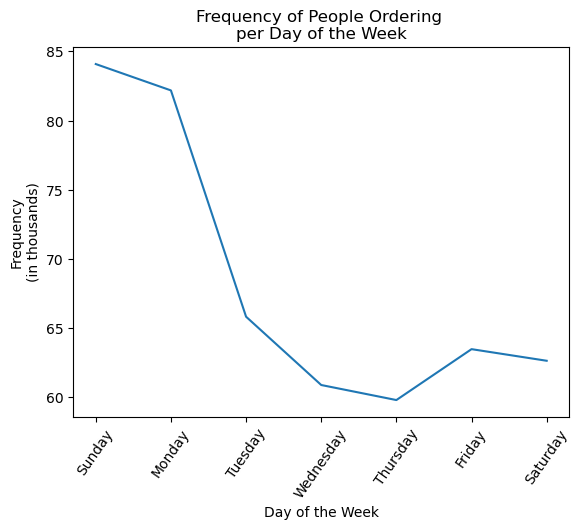

In [13]:
# Diccionario para sustituir en un replace
dia_semana = {0:'Sunday',
              1:'Monday',
              2:'Tuesday',
              3:'Wednesday',
              4:'Thursday',
              5:'Friday',
              6:'Saturday'}

# Creo una copia de mi DF
instacart_orders_copy = instacart_orders.copy()

# Hago el replace en mi columna order_dow
instacart_orders_copy['order_dow'] = instacart_orders_copy['order_dow'].replace(dia_semana)

# Agrupo y agrego mi indice en orden
dow_shopping = (instacart_orders_copy.groupby('order_dow')['user_id'].count())/1000
ordered_days = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
dow_shopping = dow_shopping.reindex(ordered_days)

dow_shopping.plot(kind='line',
                  title='Frequency of People Ordering \nper Day of the Week',
                  xlabel='Day of the Week',
                  ylabel='Frequency\n(in thousands)',
                  rot=55,
                  )

plt.show

4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su próximo pedido, y comenta los valores mínimos y máximos.

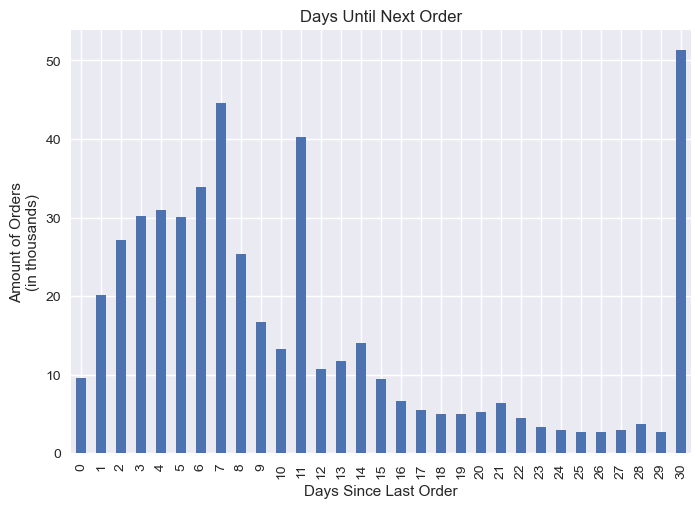

Mínimo
 days_since_prior_order
26    2640
Name: count, dtype: int64

Máximo
 days_since_prior_order
30    51337
Name: count, dtype: int64


In [20]:
# Agrego round ya que habia agregado mi mean a los valores nan y este era de 11.1, los convierto a Int para que mi gráfica no tenga decimales
days_since_graph = instacart_orders_copy['days_since_prior_order'].round().astype(int).value_counts().sort_index()

#Grafica / 1000 parta tener mis unidades en miles
(days_since_graph/1000).plot(kind='bar',
                      title='Days Until Next Order',
                      ylabel='Amount of Orders\n(in thousands)',
                      xlabel='Days Since Last Order'
                      )
plt.show()

print('Mínimo\n',days_since_graph[days_since_graph == days_since_graph.min()])
print('\nMáximo\n',days_since_graph[days_since_graph == days_since_graph.max()])

Cuando la gente mas hace pedidos es a los 30 dias de su última compra, estaba pensando que este podria significar 30 dias o mas incluso, pero no estoy seguro. A su vez a los 26 dias de su ultimo pedido es cuando menos pedidos hace la gente.

#### B

1. ¿Hay alguna diferencia en las distribuciones de 'order_hour_of_day' en miércoles y sábados? Traza los histogramas de ambos días en el mismo gráfico y describe las diferencias que observes.

In [21]:
#plt.style.use('ggplot')
plt.style.use('seaborn-v0_8')

### Documentacion plt.style
https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html

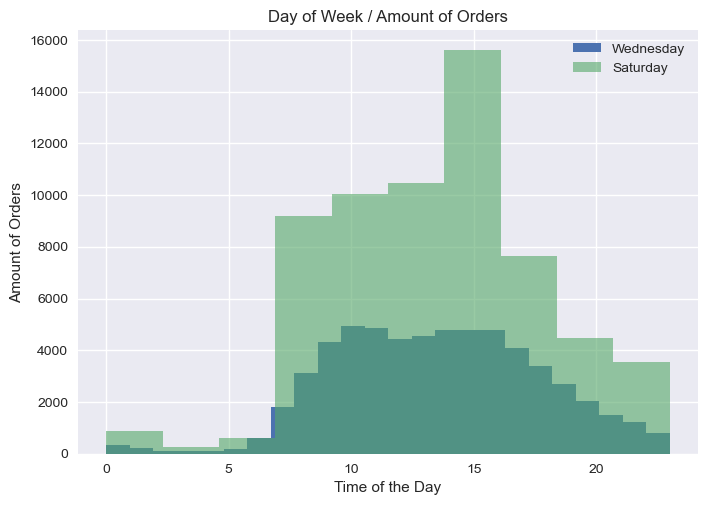

In [19]:
hist_miercoles = instacart_orders[instacart_orders['order_dow']==4]
hist_sabado = instacart_orders[instacart_orders['order_dow']==6]


hist_miercoles['order_hour_of_day'].plot(kind='hist',
                                         bins=24,
                                         title='Day of Week / Amount of Orders')
hist_sabado['order_hour_of_day'].plot(kind='hist',
                                      alpha=0.6,
                                      ylabel='Amount of Orders',
                                      xlabel='Time of the Day')

plt.legend(['Wednesday','Saturday'])
plt.show()

Podemos ver distintas cosas:
* El patrón de compra de la gente en miercoles y sabado son muy parecidos, teniendo mayor actividad de 9 a 16 hrs.
* El sabado arranca con actividad relativamente alta, mientras que el miercoles es progresivo elk aumento de actividad teniendo su pico a las 10, el sabado el pico es a las 3.
* El dia sabado se hace mas del doble de la cantidad de ventas que el día miercoles.
* Hay muy baja actividad en las madrugadas.

2. Traza la distribución del número de pedidos que hacen los clientes y las clientas (por ejemplo, cuántos clientes hicieron un solo pedido, cuántos hicieron solo dos, cuántos solo tres, etc.)

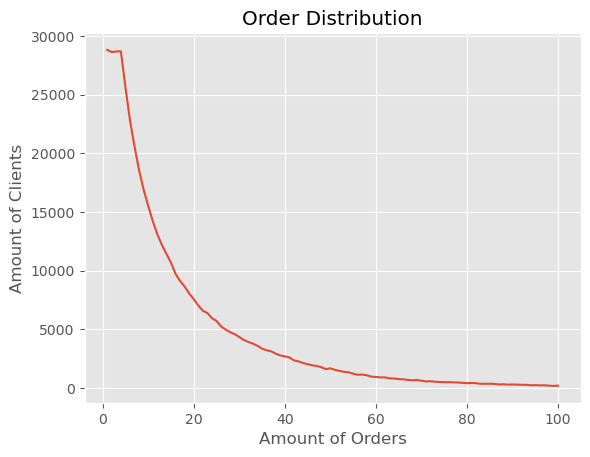

In [17]:
# Gráfico de barras con eje X de numero de pedidos, eje Y es cantidad de clientes

instacart_orders['order_number'].value_counts().sort_index().plot(kind='line',
                                                                  title='Order Distribution',
                                                                  xlabel='Amount of Orders',
                                                                  ylabel='Amount of Clients')

plt.show()

Tiene forma de curva decreciente exponencial. 

3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

#### C

1. ¿Cuántos artículos compra la gente por lo general en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que se vuelven a pedir con más frecuencia (muestra sus nombres e identificaciones de producto)?
3. Para cada producto, ¿qué proporción de sus pedidos se vuelven a pedir (crea una tabla con columnas para el ID del producto, el nombre del producto y la proporción en que se ha vuelto a comprar)?
4. ¿Cuál es la proporción de productos pedidos que se vuelven a pedir para cada cliente?
5. ¿Cuáles son los 20 principales artículos que la gente pone en sus carritos primero (muestra las identificaciones de los productos, los nombres de los productos y el número de veces que fueron el primer artículo añadido al carrito)?